<a href="https://colab.research.google.com/github/Meshal-Css/Project/blob/main/Online_Payments_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179014 non-null  int64  
 1   type            179014 non-null  object 
 2   amount          179014 non-null  float64
 3   nameOrig        179013 non-null  object 
 4   oldbalanceOrg   179013 non-null  float64
 5   newbalanceOrig  179013 non-null  float64
 6   nameDest        179013 non-null  object 
 7   oldbalanceDest  179013 non-null  float64
 8   newbalanceDest  179013 non-null  float64
 9   isFraud         179013 non-null  float64
 10  isFlaggedFraud  179013 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.0+ MB


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
df.shape

(179014, 11)

In [6]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
179009,12,CASH_IN,200271.90,C1829080213,3896164.44,4096436.33,C1769155229,531167.90,690790.44,0.0,0.0
179010,12,CASH_IN,266616.13,C1119089903,4096436.33,4363052.46,C859300166,6064698.49,6080565.41,0.0,0.0
179011,12,CASH_IN,194735.24,C595356999,4363052.46,4557787.70,C803648645,288407.25,152597.27,0.0,0.0
179012,12,CASH_IN,61212.03,C1705359203,4557787.70,4618999.73,C60296041,2492638.18,2620615.37,0.0,0.0
179013,12,CASH_IN,16.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
df.dropna(inplace = True) # drop na

In [10]:
df.duplicated().sum()

0

In [52]:
df.corr(numeric_only=True)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
step,1.000000,-0.068827,0.053716,-0.003387,-0.002984,0.020696,0.007400,NaN
type,-0.068827,1.000000,0.313839,0.263341,0.272978,0.072392,0.089105,NaN
amount,0.053716,0.313839,1.000000,-0.019359,-0.023891,0.223895,0.349275,NaN
oldbalanceOrg,-0.003387,0.263341,-0.019359,1.000000,0.998970,0.097961,0.066721,NaN
newbalanceOrig,-0.002984,0.272978,-0.023891,0.998970,1.000000,0.099503,0.065720,NaN
oldbalanceDest,0.020696,0.072392,0.223895,0.097961,0.099503,1.000000,0.949306,NaN
newbalanceDest,0.007400,0.089105,0.349275,0.066721,0.065720,0.949306,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            pass


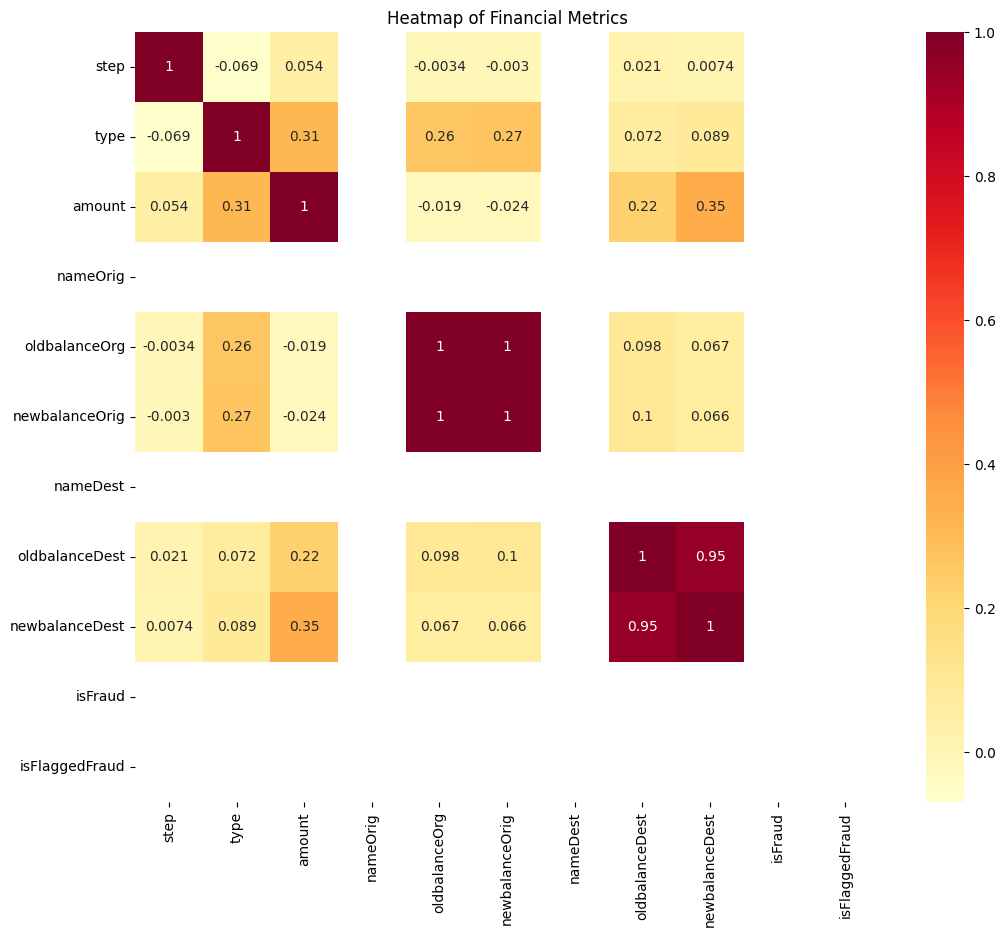

In [57]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlOrRd')
plt.title('Heatmap of Financial Metrics')
plt.show()

In [15]:
df['type'].value_counts()

,count
type,
PAYMENT,66741
CASH_OUT,58910
CASH_IN,36871
TRANSFER,14917
DEBIT,1574


In [16]:
type = df['type'].value_counts()
transactions = type.index
quantity = type.values
import plotly.express as px
figure = px.pie(df,
                values = quantity,
                names = transactions,
                hole = 0.5,
                title = 'Distribution of Transactions Type')
figure.show()

In [60]:
import plotly.graph_objects as go

In [65]:
fraud_counts = df['isFraud'].value_counts()

In [17]:
# transform
df['type'] = df['type'].map({'CASH_OUT': 1, 'PAYMENT': 2, 'CASH_IN': 3, 'TRANSFER': 4, 'DEBIT': 5})
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
179008,12,3,66901.99,C2056749338,3829262.45,3896164.44,C469830007,390202.15,323300.16,0.0,0.0
179009,12,3,200271.90,C1829080213,3896164.44,4096436.33,C1769155229,531167.90,690790.44,0.0,0.0
179010,12,3,266616.13,C1119089903,4096436.33,4363052.46,C859300166,6064698.49,6080565.41,0.0,0.0
179011,12,3,194735.24,C595356999,4363052.46,4557787.70,C803648645,288407.25,152597.27,0.0,0.0


In [18]:
# transform
df['isFraud'] = df['isFraud'].map({0: 'No Fraud', 1: 'Fraud'})
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0.0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0.0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0.0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0.0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
179008,12,3,66901.99,C2056749338,3829262.45,3896164.44,C469830007,390202.15,323300.16,No Fraud,0.0
179009,12,3,200271.90,C1829080213,3896164.44,4096436.33,C1769155229,531167.90,690790.44,No Fraud,0.0
179010,12,3,266616.13,C1119089903,4096436.33,4363052.46,C859300166,6064698.49,6080565.41,No Fraud,0.0
179011,12,3,194735.24,C595356999,4363052.46,4557787.70,C803648645,288407.25,152597.27,No Fraud,0.0


In [64]:
df['isFraud'].value_counts()

,count
isFraud,


<Axes: xlabel='isFraud', ylabel='count'>

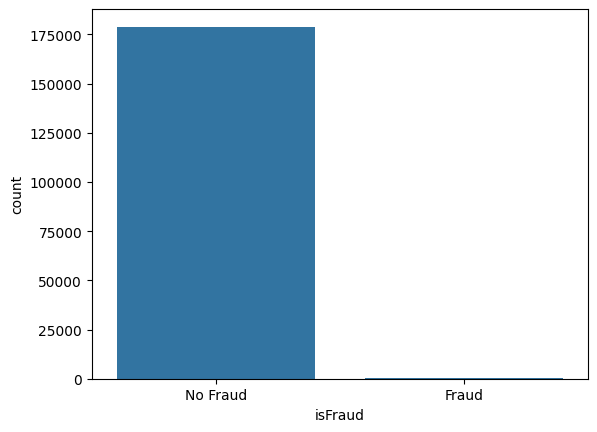

In [25]:
sns.countplot(x = 'isFraud',  data = df)

In [28]:
from sklearn.model_selection import train_test_split
X = np.array(df[['step','type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])
y = np.array(df[['isFraud']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = LogisticRegression()
model4 = KNeighborsClassifier()

In [35]:
model1.fit(X_train, y_train.ravel())
model2.fit(X_train, y_train.ravel())
model3.fit(X_train, y_train.ravel())
model4.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [37]:
print('Decision Tree classifier : ', model1.score(X_test, y_test))

Decision Tree classifier :  0.9989945257513128


In [38]:
print('Random Forest classifier : ', model2.score(X_test, y_test))

Random Forest classifier :  0.9994972628756563


In [39]:
print('Logistic Regression classifier : ', model3.score(X_test, y_test))

Logistic Regression classifier :  0.9993296838342085


In [41]:
print('KNN classifier : ', model4.score(X_test, y_test))

KNN classifier :  0.9994972628756563


In [42]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0.0


In [47]:
# test
features = np.array([[1, 2,9839.64,170136.0,160296.36	]])
prediction = model1.predict(features)
print(prediction)

['No Fraud']


In [49]:
# test
features = np.array([[1, 2,9839.64,170136.0,160296.36	]])
prediction = model2.predict(features)
print(prediction)

['No Fraud']


In [50]:
# test
features = np.array([[1, 2,9839.64,170136.0,160296.36	]])
prediction = model3.predict(features)
print(prediction)

['No Fraud']


In [51]:
# test
features = np.array([[1, 2,9839.64,170136.0,160296.36	]])
prediction = model4.predict(features)
print(prediction)

['No Fraud']
